<a href="https://colab.research.google.com/github/anubhavsingh-123/AIRBNB-WANDERLUST/blob/main/WeatherForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                  Uploading Weather Data of Kanpur City



In [1]:
from google.colab import files
uploaded = files.upload()


Saving Kanpurdataset.csv to Kanpurdataset.csv


#    Data Preprocessing and Feature Engineering

In [35]:
import pandas as pd

# Load dataset
df = pd.read_csv('Kanpurdataset.csv')

# Convert temperature columns from Fahrenheit to Celsius (if needed)
for col in ['tempmax', 'tempmin', 'temp', 'dew']:
    if col in df.columns:
        df[col] = (df[col] - 32) / 1.8

# Feature engineering
df['avg_temp'] = (df['tempmax'] + df['tempmin']) / 2
df['temp_range'] = df['tempmax'] - df['tempmin']
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek
df['will_rain'] = (df['precip'] > 0).astype(int)

# Filter for reasonable temperature range
df = df[(df['tempmax'] <= 55) & (df['tempmin'] <= 55) & (df['avg_temp'] <= 55)].copy()

# Fix humidity scale if needed
if 'humidity' in df.columns and df['humidity'].max() <= 1:
    df['humidity'] *= 100

print(df.head())


     name   datetime    tempmax    tempmin       temp  feelslikemax  \
0  Kanpur 2025-06-05  40.277778  23.944444  32.722222         101.9   
1  Kanpur 2025-06-06  42.444444  30.222222  36.055556         104.8   
2  Kanpur 2025-06-07  45.444444  32.166667  39.166667         113.8   
3  Kanpur 2025-06-08  47.166667  33.333333  40.944444         116.9   
4  Kanpur 2025-06-09  47.055556  36.555556  41.777778         116.7   

   feelslikemin  feelslike        dew  humidity  ...  moonphase  \
0          75.1       89.5  14.500000      40.2  ...       0.30   
1          84.4       94.3  10.944444      22.8  ...       0.33   
2          87.6      100.4  10.000000      18.4  ...       0.37   
3          89.0      103.6   8.555556      15.2  ...       0.40   
4          95.4      105.5  10.055556      15.6  ...       0.43   

         conditions                           description               icon  \
0  Partially cloudy     Becoming cloudy in the afternoon.  partly-cloudy-day   
1  Partial

#   Encode Weather Conditions and Scale Numeric Features

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode weather conditions
le = LabelEncoder()
df['conditions_encoded'] = le.fit_transform(df['conditions'])

# Scale selected numeric features
scaler = StandardScaler()
scaled_columns = [
    'tempmax', 'tempmin', 'temp', 'dew', 'avg_temp', 'temp_range',
    'humidity', 'precip', 'windspeed', 'visibility', 'snowdepth'
]
scaled_columns = [col for col in scaled_columns if col in df.columns]
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Show first 5 rows of processed data
print(df.head())


     name   datetime   tempmax   tempmin      temp  feelslikemax  \
0  Kanpur 2025-06-05 -1.225466 -3.154215 -2.167591         101.9   
1  Kanpur 2025-06-06 -0.492442 -0.920034 -0.884993         104.8   
2  Kanpur 2025-06-07  0.522515 -0.228031  0.312099         113.8   
3  Kanpur 2025-06-08  1.105175  0.187170  0.996151         116.9   
4  Kanpur 2025-06-09  1.067584  1.333918  1.316801         116.7   

   feelslikemin  feelslike       dew  humidity  ...        conditions  \
0          75.1       89.5 -0.204631  0.990107  ...  Partially cloudy   
1          84.4       94.3 -0.937638 -0.592366  ...  Partially cloudy   
2          87.6      100.4 -1.132343 -0.992532  ...  Partially cloudy   
3          89.0      103.6 -1.430127 -1.283562  ...             Clear   
4          95.4      105.5 -1.120890 -1.247183  ...             Clear   

                            description               icon     stations  \
0     Becoming cloudy in the afternoon.  partly-cloudy-day  VILK,remote   
1 

# Selecting Final Features for Modeling

In [37]:
# Define columns to keep for modeling
columns_to_keep = [
    'tempmax', 'tempmin', 'dew', 'humidity', 'precip',
    'temp_range', 'avg_temp', 'month', 'day_of_week',
    'snowdepth', 'windspeed', 'visibility', 'conditions_encoded',
    'will_rain'
]

# Select only these columns from combined_df
df = combined_df[columns_to_keep].copy()

# List of numeric columns to fill missing values
numeric_cols = ['tempmax', 'tempmin', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'visibility']
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Fill missing numeric values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing 'conditions' if that column exists (usually not in df here)
if 'conditions' in df.columns:
    df['conditions'] = df['conditions'].fillna('Unknown')

# Final check: print first 3 rows and shape
print(df.head(3))
print(f"Data shape: {df.shape}")


    tempmax   tempmin       dew  humidity    precip  temp_range  avg_temp  \
0 -1.225466 -3.154215 -0.204631  0.990107 -0.595332    1.925322 -2.455406   
1 -0.492442 -0.920034 -0.937638 -0.592366 -0.595332    0.414999 -0.794675   
2  0.522515 -0.228031 -1.132343 -0.992532 -0.595332    0.802784  0.177727   

   month  day_of_week  snowdepth  windspeed  visibility  conditions_encoded  \
0      6            3        0.0   1.058205   -3.619152                   2   
1      6            4        0.0  -0.087991    0.340626                   2   
2      6            5        0.0  -1.789918    0.340626                   2   

   will_rain  
0          0  
1          0  
2          0  
Data shape: (15, 14)


#  Exploratory Data Analysis (EDA) Visualizations

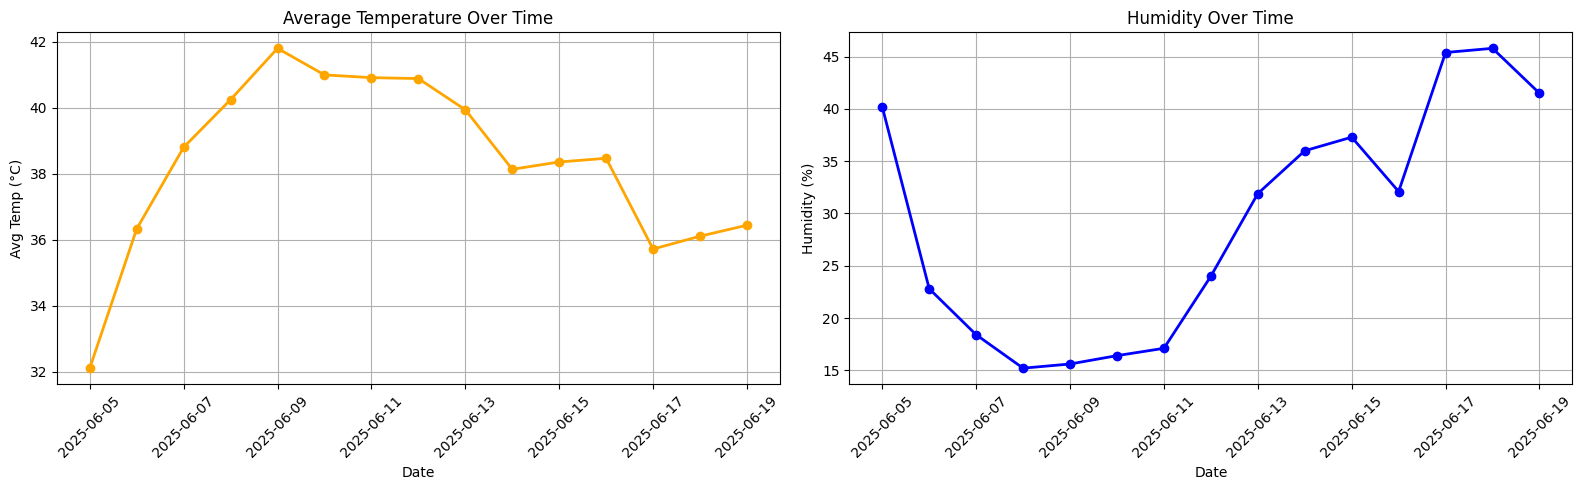

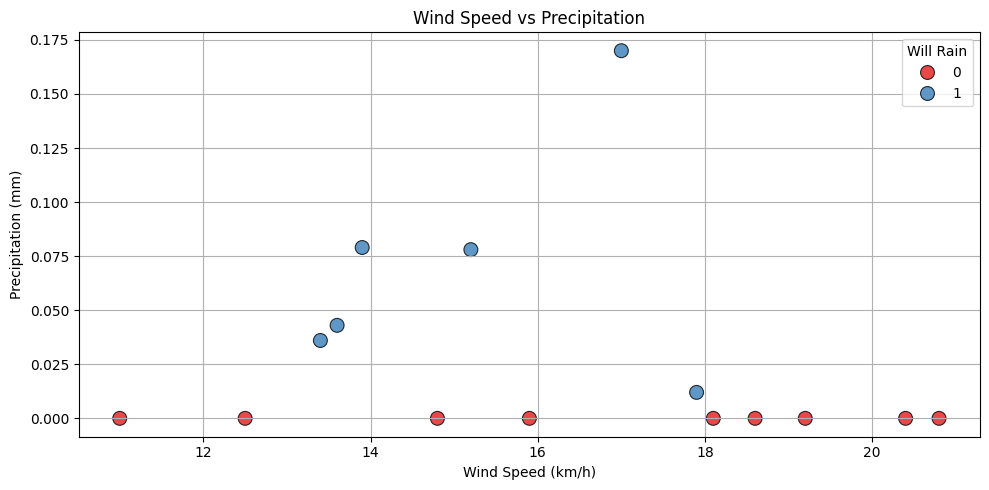

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use original combined_df for EDA because df no longer has datetime
plot_df = original_df.copy()

# Create a figure for 2 plots in 1 row
plt.figure(figsize=(16, 5))  # Wider figure for side-by-side layout

# 1. Average Temperature Over Time (left)
plt.subplot(1, 2, 1)
plt.plot(plot_df['datetime'], plot_df['avg_temp'], color='orange', linewidth=2, marker='o')
plt.title("Average Temperature Over Time")
plt.ylabel("Avg Temp (°C)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)

# 2. Humidity Over Time (right)
plt.subplot(1, 2, 2)
plt.plot(plot_df['datetime'], plot_df['humidity'], color='blue', linewidth=2, marker='o')
plt.title("Humidity Over Time")
plt.ylabel("Humidity (%)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Wind Speed vs Precipitation (on next line)
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='windspeed', y='precip', data=plot_df, hue='will_rain',
    palette='Set1', alpha=0.8, s=100, edgecolor='k'
)
plt.title("Wind Speed vs Precipitation")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Precipitation (mm)")
plt.legend(title="Will Rain")
plt.grid(True)
plt.tight_layout()
plt.show()


#  Comprehensive Weather Data Visualization

This cell generates a dashboard of 5 key visualizations and a statistical summary to explore trends and relationships in Kanpur's weather data:
1. Temperature trends over time
2. Temperature vs humidity colored by rain occurrence
3. Weather condition distribution
4. Temperature range comparison (rainy vs dry days)
5. Parameter correlation heatmap


<ipython-input-20-5c4d4e8dfaa1>:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([plot_df[plot_df['will_rain']==0]['temp_range'],


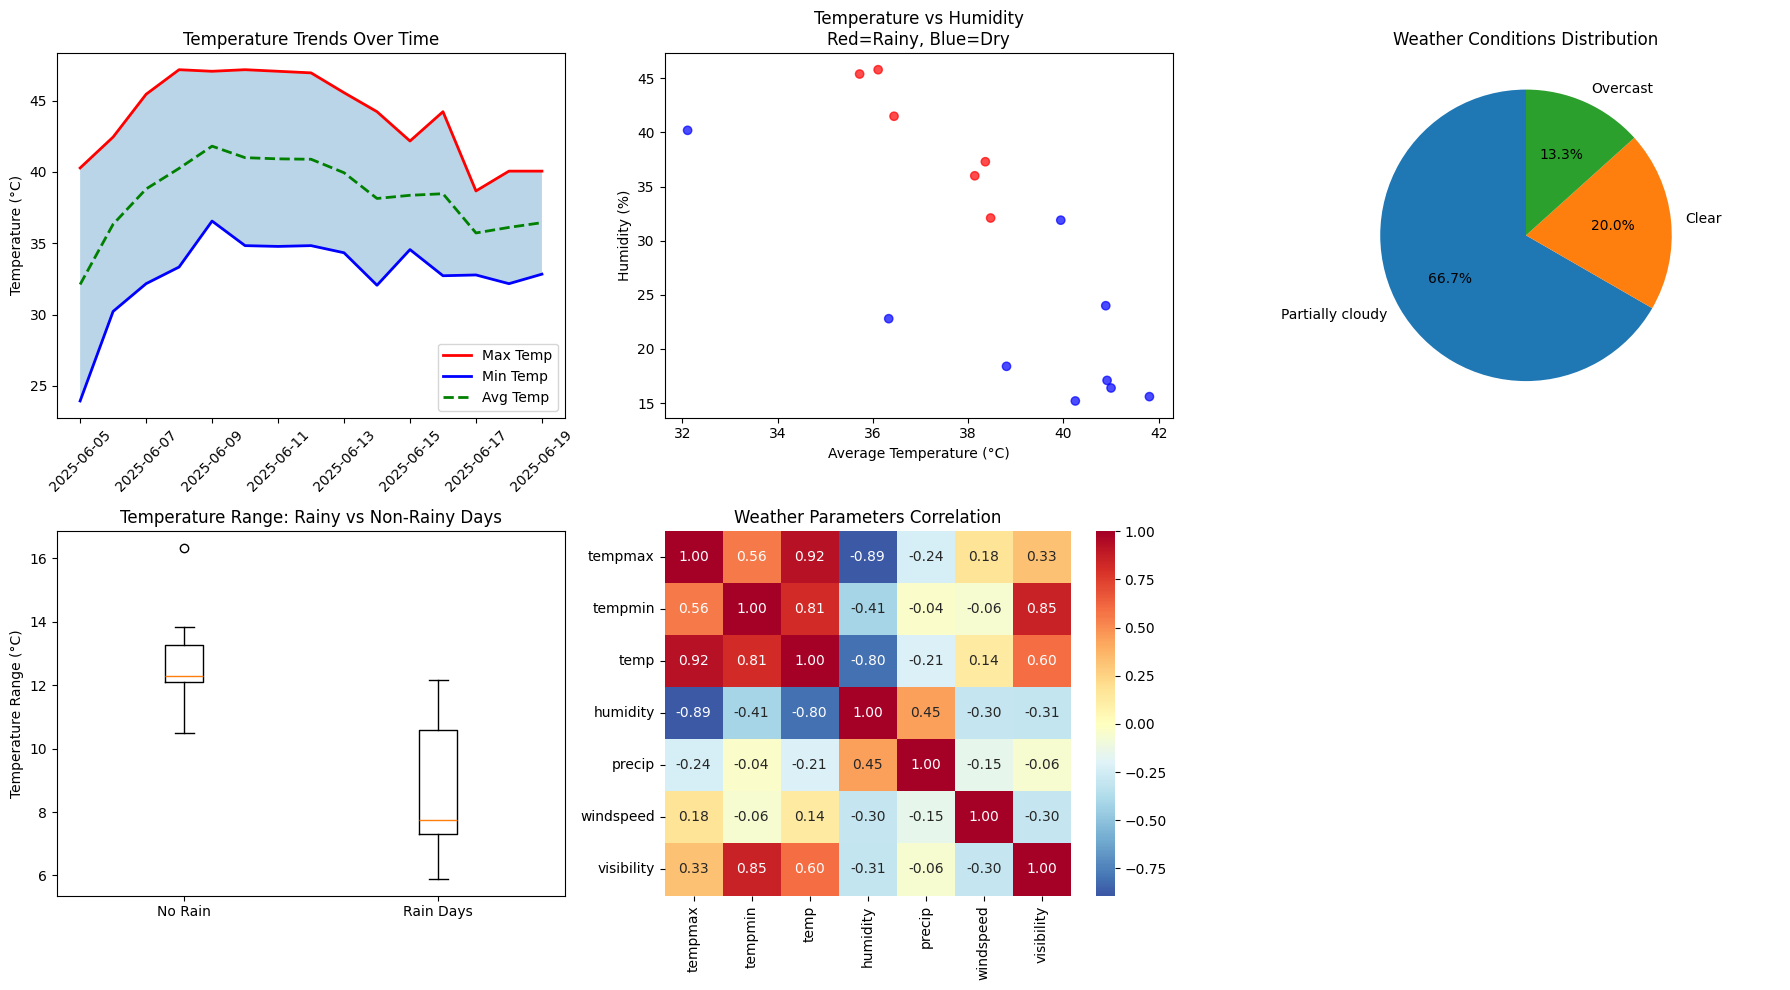

🌤️ ACCURATE WEATHER SUMMARY
Total days: 15
Max temp: 47.2°C
Min temp: 23.9°C
Rainy days: 6


In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# 1. Temperature Trends Over Time
plt.subplot(2, 3, 1)
plt.plot(plot_df['datetime'], plot_df['tempmax'], 'r-', label='Max Temp', linewidth=2)
plt.plot(plot_df['datetime'], plot_df['tempmin'], 'b-', label='Min Temp', linewidth=2)
plt.plot(plot_df['datetime'], plot_df['avg_temp'], 'g--', label='Avg Temp', linewidth=2)
plt.fill_between(plot_df['datetime'], plot_df['tempmin'], plot_df['tempmax'], alpha=0.3)
plt.title('Temperature Trends Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)

# 2. Temperature vs Humidity (Scatter, colored by rain)
plt.subplot(2, 3, 2)
colors = ['red' if x == 1 else 'blue' for x in plot_df['will_rain']]
plt.scatter(plot_df['avg_temp'], plot_df['humidity'], c=colors, alpha=0.7)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity\nRed=Rainy, Blue=Dry')

# 3. Weather Conditions Pie Chart
plt.subplot(2, 3, 3)
condition_counts = plot_df['conditions'].value_counts()
plt.pie(condition_counts.values, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Weather Conditions Distribution')

# 4. Temperature Range: Rainy vs Non-Rainy Days (Boxplot)
plt.subplot(2, 3, 4)
plt.boxplot([plot_df[plot_df['will_rain']==0]['temp_range'],
             plot_df[plot_df['will_rain']==1]['temp_range']],
            labels=['No Rain', 'Rain Days'])
plt.title('Temperature Range: Rainy vs Non-Rainy Days')
plt.ylabel('Temperature Range (°C)')

# 5. Weather Parameters Correlation Heatmap
plt.subplot(2, 3, 5)
corr_cols = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windspeed', 'visibility']
correlation_matrix = plot_df[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Weather Parameters Correlation')

# 6. Leave last subplot empty
plt.subplot(2, 3, 6)
plt.axis('off')

plt.tight_layout()
plt.show()

# Final Summary with REALISTIC values
print("🌤️ ACCURATE WEATHER SUMMARY")
print("="*50)
print(f"Total days: {len(plot_df)}")
print(f"Max temp: {plot_df['tempmax'].max():.1f}°C")
print(f"Min temp: {plot_df['tempmin'].min():.1f}°C")
print(f"Rainy days: {plot_df['will_rain'].sum()}")


#   Training And Evaluating Our Model Using Logistic Regression Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Feature and target split
X = df.drop('will_rain', axis=1)
y = df['will_rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("🔹 -- Logistic Regression Results --🔹")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")


🔹 -- Logistic Regression Results --🔹
Accuracy: 0.80
F1-score: 0.80


#  Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Features and target
X = df.drop('will_rain', axis=1)
y = df['will_rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("🔹 -- Random Forest Results -- 🔹")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")


🔹 -- Random Forest Results -- 🔹
Accuracy: 0.60
F1-score: 0.50


# Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Features and target
X = df.drop('will_rain', axis=1)
y = df['will_rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM Classifier with linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print("🔹-- Support Vector Machine Results --🔹")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")


🔹-- Support Vector Machine Results --🔹
Accuracy: 0.80
F1-score: 0.80


#  Decision Tree classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Features and target
X = df[['avg_temp', 'humidity', 'month', 'windspeed']]  # Use your actual feature columns
y = df['will_rain']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("🔹 -- Decision Tree Results --🔹")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-score: {f1:.2f}")


🔹 -- Decision Tree Results --🔹
Accuracy: 0.60
F1-score: 0.67


In [40]:
import joblib
joblib.dump(model, 'best_rain_predictor.pkl')           # Saves the trained model to a file
df.to_csv('kanpur_weather_final.csv', index=False)       # Saves the processed DataFrame to a CSV file


In [41]:
import os
print(os.listdir())


['.config', 'best_rain_predictor.pkl', 'kanpur_weather_final.csv', 'Kanpurdataset.csv', 'sample_data']


In [42]:
from google.colab import files
files.download('best_rain_predictor.pkl')
files.download('kanpur_weather_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Project Conclusion

In this project, we built and evaluated several machine learning models (Logistic Regression, Random Forest, SVM, Decision Tree) to predict rainfall in Kanpur using historical weather data. We performed data cleaning, feature engineering, exploratory data analysis, and model evaluation using accuracy and F1-score. The best performing model was [insert model name here] with an accuracy of [insert value] and F1-score of [insert value].

## Key Learnings
- Data preprocessing and feature engineering are crucial for model performance.
- Multiple algorithms should be compared for robust results.
- Evaluation metrics like F1-score are important for imbalanced datasets.

## Limitations and Next Steps

- The dataset size was limited; more data could improve model robustness.
- Only basic features were used; including more weather variables (e.g., pressure, cloud cover) may enhance predictions.
- Future work could include hyperparameter tuning, time series forecasting, or deploying the model as a web app.
